In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (12,14)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

In [3]:
dataset = pd.read_csv("ev_data_processed.csv")
#Parse string to date time type
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'], infer_datetime_format= True)
Original_indexed_dataset = dataset.set_index(['time_stamp'])

In [4]:
from datetime import datetime
Original_indexed_dataset.head(20)

,power
time_stamp,
2020-01-05 02:00:00,7200
2020-01-05 03:00:00,93600
2020-01-05 04:00:00,100800
2020-01-05 05:00:00,187200
2020-01-05 06:00:00,86400
2020-01-05 07:00:00,187200
2020-01-05 08:00:00,237600
2020-01-05 09:00:00,165600
2020-01-05 10:00:00,172800


**Lets see what we have in this data .......**





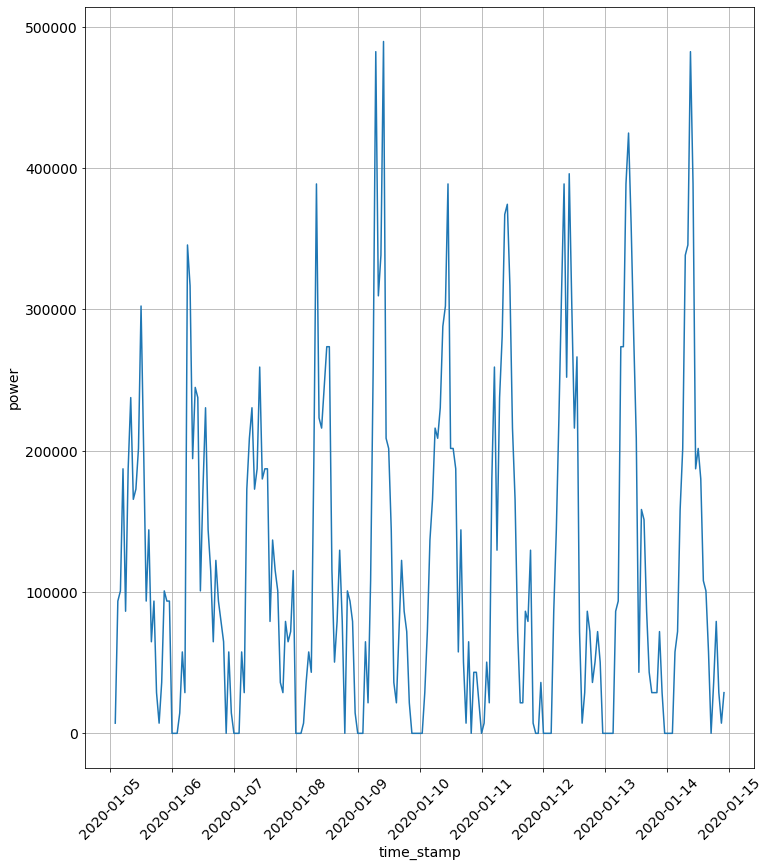

In [5]:
plt.xlabel('time_stamp')
plt.ylabel('power')
plt.plot(Original_indexed_dataset)
plt.show
plt.tick_params(axis ='x', rotation = 45)

**We now want to determine the Rolling Mean and Variance for the above dataset**

In [6]:
rolmean = Original_indexed_dataset.rolling(window=12).mean()
rolstd = Original_indexed_dataset.rolling(window=12).std()
print("The rolling mean is: ",rolmean)
#print( "The rolling standard deviation is : ", rolstd)

The rolling mean is:                          power
time_stamp                   
2020-01-05 02:00:00       NaN
2020-01-05 03:00:00       NaN
2020-01-05 04:00:00       NaN
2020-01-05 05:00:00       NaN
2020-01-05 06:00:00       NaN
...                       ...
2020-01-14 18:00:00  202200.0
2020-01-14 19:00:00  180600.0
2020-01-14 20:00:00  154200.0
2020-01-14 21:00:00  114600.0
2020-01-14 22:00:00   84600.0

[237 rows x 1 columns]


**Comparison between the rolling mean and SD with the original dataset**

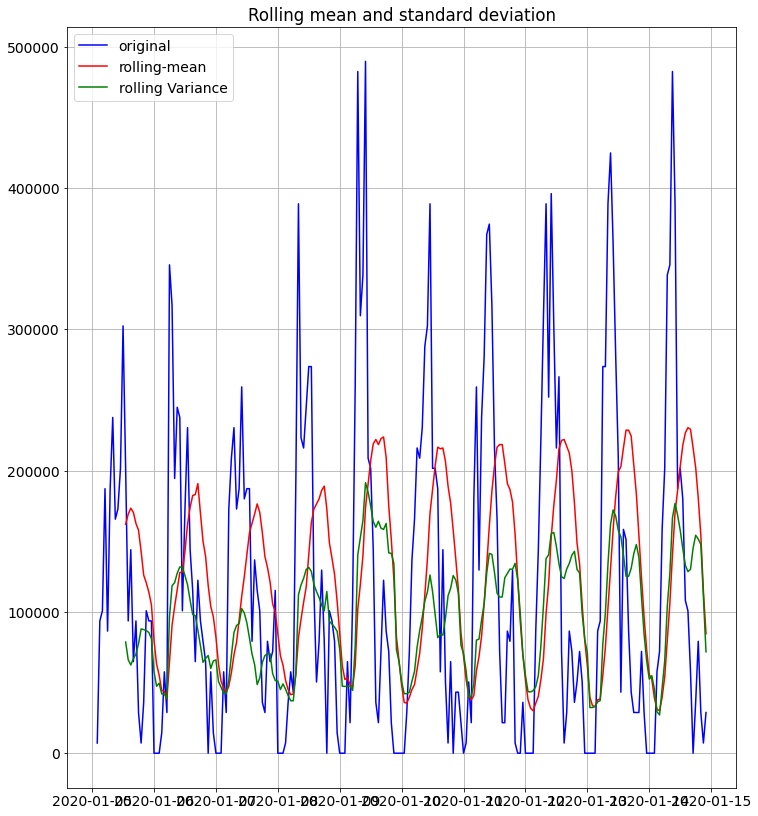

In [7]:
Original = plt.plot(Original_indexed_dataset, color = 'blue', label = 'original')
mean = plt.plot(rolmean, color = 'red', label = 'rolling-mean')
std = plt.plot(rolstd, color = 'green', label = 'rolling Variance')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

**Checking stationarity with Augmented Dickey Fuller Test**

In [8]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test: ')
dftest = adfuller(Original_indexed_dataset['power'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', 'Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller test: 
Test statistic                -9.928434e+00
p-value                        2.865347e-17
Lags used                      1.500000e+01
Number of observations used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64


**Function for checking the rolling mean and augmented dickey fuller test**

In [9]:
def testing_stationary(test_timeseries_dataset):

  # Determining the rolling average and the variance
  rolavg = test_timeseries_dataset.rolling(window=12).mean()
  rolstandev = test_timeseries_dataset.rolling(window=12).std()

  # Plot and compare with the original 

  Orig = plt.plot(test_timeseries_dataset, color = 'blue', label = 'original')
  mean = plt.plot(rolavg, color = 'red', label = 'rolling-mean')
  std = plt.plot(rolstandev, color = 'green', label = 'rolling Variance')
  plt.legend(loc='best')
  plt.title('Rolling mean and standard deviation')
  plt.show(block=False)

  # Perform Dickey Fuller Test

  print ('Results of Dickey-Fuller test: ')
  dftest = adfuller(Original_indexed_dataset['power'], autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', 'Lags used', 'Number of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

  print(dfoutput)

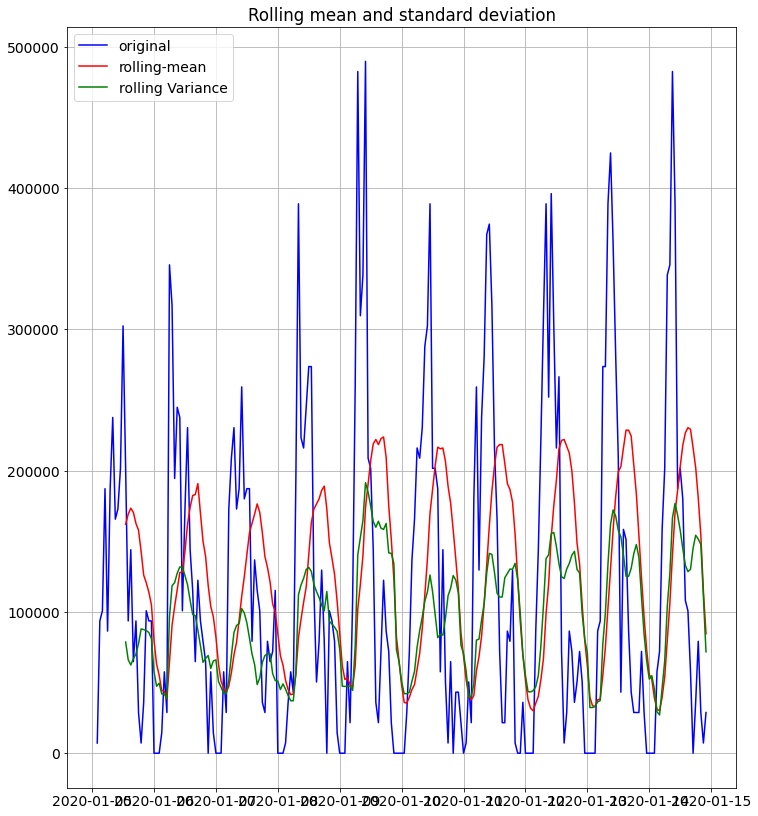

Results of Dickey-Fuller test: 
Test statistic                -9.928434e+00
p-value                        2.865347e-17
Lags used                      1.500000e+01
Number of observations used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64


In [10]:
testing_stationary(Original_indexed_dataset)

**Auto Correlation and Partial Auto Correlation**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


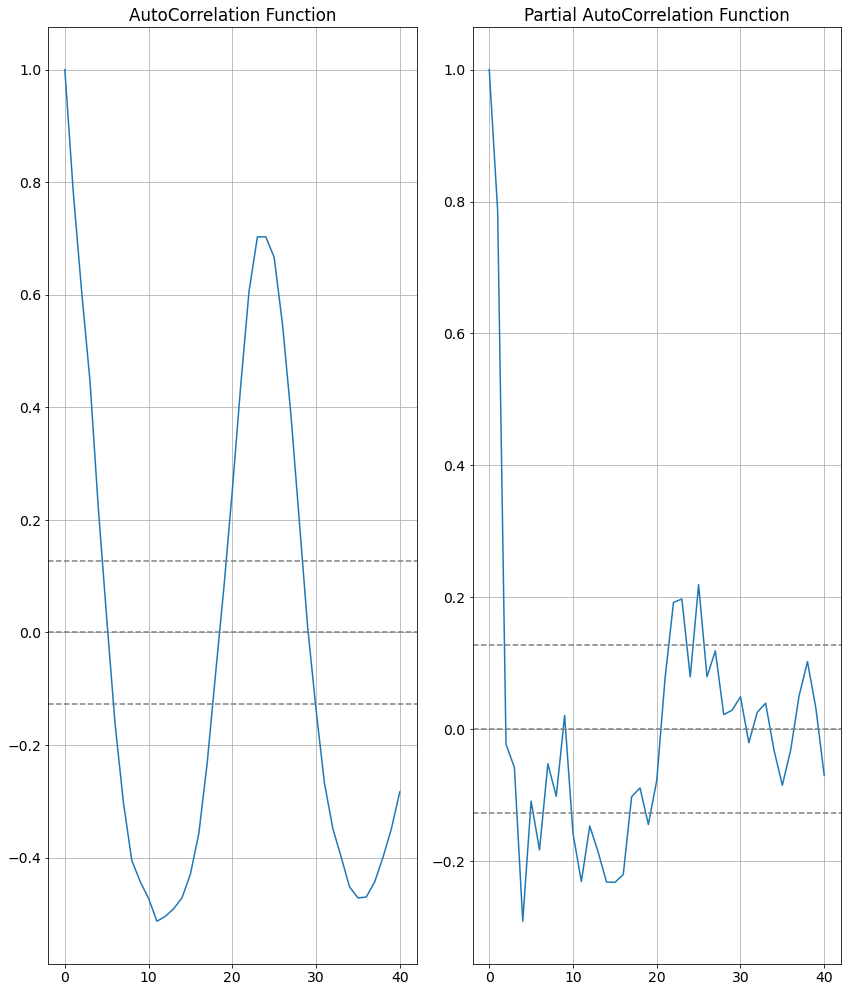

In [11]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(Original_indexed_dataset, nlags =40)
lag_pacf = pacf(Original_indexed_dataset, nlags = 40, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(Original_indexed_dataset)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(Original_indexed_dataset)), linestyle = '--', color = 'gray')
plt.title('AutoCorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(Original_indexed_dataset)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(Original_indexed_dataset)), linestyle = '--', color = 'gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

In [12]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(Original_indexed_dataset)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'bic':              0            1            2
 0  6211.004401  6066.355805  6042.843830
 1  5988.471146  5993.828370  5998.897759
 2  5993.814009  5963.801926  6013.662618
 3  5998.485141  5960.616980  6017.083038
 4  5983.120235  5955.887084  6017.453205, 'bic_min_order': (4, 1)}

# **Only AR Model**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


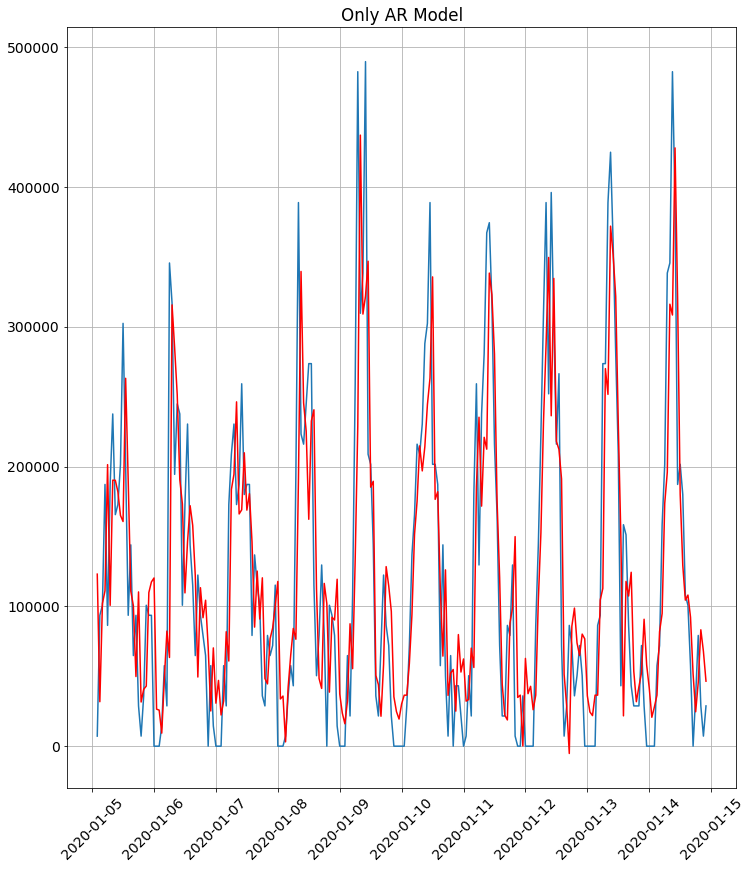

In [25]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(Original_indexed_dataset, order = (4,0,0))
results_AR = model.fit(disp=-1)
plt.plot(Original_indexed_dataset)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Only AR Model')
plt.tick_params(axis ='x', rotation = 45)
plt.show()



# **Only MA Model**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


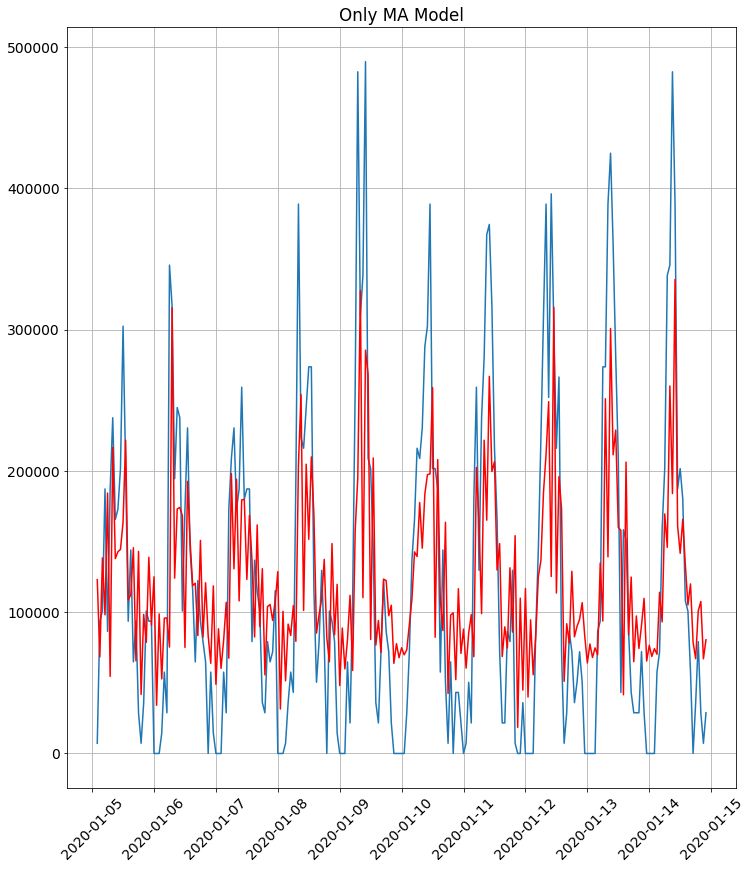

In [26]:
 from statsmodels.tsa.arima_model import ARIMA
 #AR Model
 model = ARIMA(Original_indexed_dataset, order = (0,0,1))
 results_MA = model.fit(disp=-1)
 plt.plot(Original_indexed_dataset)
 plt.plot(results_MA.fittedvalues, color='red')
 plt.title('Only MA Model')
 plt.tick_params(axis ='x', rotation = 45)
 plt.show()

# **ARIMA MODEL**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


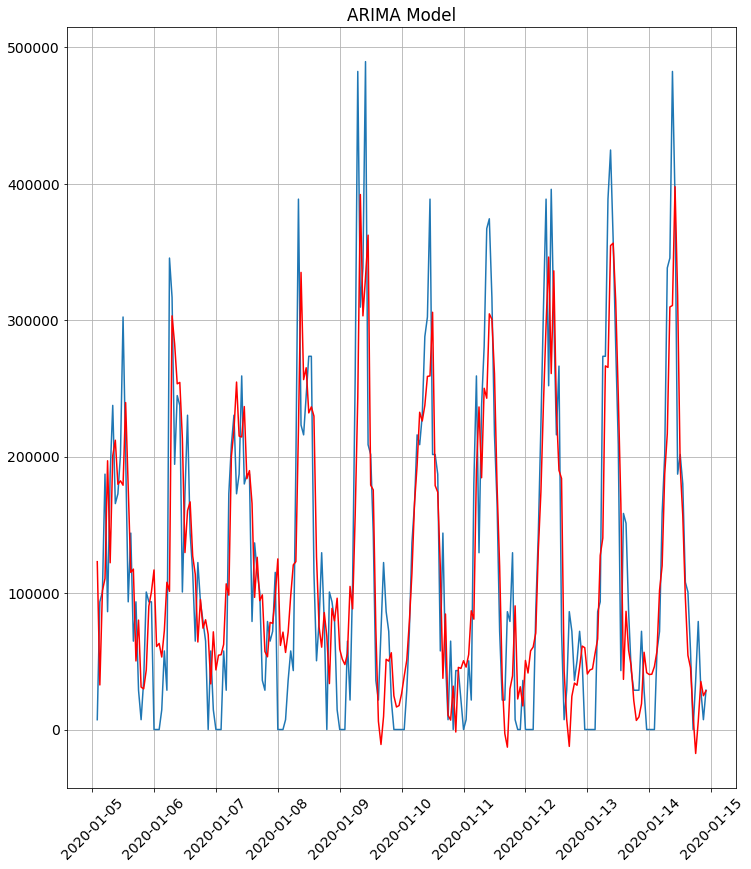

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(Original_indexed_dataset, order = (4,0,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(Original_indexed_dataset)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model')
plt.tick_params(axis ='x', rotation = 45)
plt.show()


In [16]:
#Predictions
predictions_ARIMA  = pd.Series(results_ARIMA.fittedvalues)
print(predictions_ARIMA.head())


time_stamp
2020-01-05 02:00:00    123037.974632
2020-01-05 03:00:00     32669.612223
2020-01-05 04:00:00    101699.655862
2020-01-05 05:00:00    110681.278203
2020-01-05 06:00:00    197005.880430
dtype: float64


In [17]:
results_ARIMA.forecast(steps=20)

(array([ 41132.52014078,  56031.75855554,  79153.62256563, 103047.48139688,
        125803.88379429, 146914.56071861, 164520.71362398, 177403.33744643,
        185083.8752244 , 187383.46330644, 184532.68745431, 177178.15105493,
        166253.08571633, 152883.85948314, 138297.71497252, 123716.56580915,
        110262.19411549,  98879.18352247,  90276.41760479,  84891.32961307]),
 array([ 63573.48233153,  74017.3561533 ,  77259.96005663,  79985.17468185,
         80683.46702803,  80685.69852881,  81168.98724311,  82756.32367107,
         85610.15717969,  89286.6258784 ,  93150.7446928 ,  96618.69049985,
         99281.89703889, 100989.09928794, 101831.80331517, 102078.19163735,
        102083.4868161 , 102187.03834557, 102621.03611061, 103458.94259128]),
 array([[ -83469.21560081,  165734.25588237],
        [ -89039.5937358 ,  201103.11084687],
        [ -72273.11659236,  230580.36172362],
        [ -53720.58027669,  259815.54307044],
        [ -32332.80572848,  283940.57331706],
      